In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("../data/public/strava_full_data.csv", sep=",")
print(df.head())




   Unnamed: 0  average_speed  max_speed  average_heartrate  max_heartrate  \
0           0          3.142        5.3                NaN            NaN   
1           1          3.410        7.4                NaN            NaN   
2           2          3.273        4.0                NaN            NaN   
3           3          3.259        4.0                NaN            NaN   
4           4          3.222        4.0                NaN            NaN   

   distance elapsed_time moving_time  total_elevation_gain  elev_high type  \
0   11443.2      1:03:50     1:00:42                  73.0      115.0  Run   
1    9486.0      0:48:51     0:46:22                  36.1       96.9  Run   
2    8854.8      0:45:32     0:45:05                  16.0      117.2  Run   
3    7717.5      0:39:35     0:39:28                  10.0      131.6  Run   
4    7659.5      0:41:33     0:39:37                  12.0      107.4  Run   

      start_date_local  kudos_count  
0  2020-01-18T12:00:36        

In [9]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1121 entries, 0 to 1120
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            1121 non-null   int64  
 1   average_speed         1121 non-null   float64
 2   max_speed             1121 non-null   float64
 3   average_heartrate     190 non-null    float64
 4   max_heartrate         190 non-null    float64
 5   distance              1121 non-null   float64
 6   elapsed_time          1120 non-null   object 
 7   moving_time           1120 non-null   object 
 8   total_elevation_gain  1121 non-null   float64
 9   elev_high             1072 non-null   float64
 10  type                  1121 non-null   object 
 11  start_date_local      1121 non-null   object 
 12  kudos_count           1121 non-null   int64  
dtypes: float64(7), int64(2), object(4)
memory usage: 114.0+ KB
None


In [10]:
df.isna().sum()

Unnamed: 0                0
average_speed             0
max_speed                 0
average_heartrate       931
max_heartrate           931
distance                  0
elapsed_time              1
moving_time               1
total_elevation_gain      0
elev_high                49
type                      0
start_date_local          0
kudos_count               0
dtype: int64

In [11]:
df.dtypes

Unnamed: 0                int64
average_speed           float64
max_speed               float64
average_heartrate       float64
max_heartrate           float64
distance                float64
elapsed_time             object
moving_time              object
total_elevation_gain    float64
elev_high               float64
type                     object
start_date_local         object
kudos_count               int64
dtype: object

In [12]:
df.rename(columns={"average_heartrate": "avg_hr"}, inplace=True)
df["distance_km"] = df["distance"] / 1000

df['elapsed_time'] = pd.to_timedelta(df['elapsed_time'])
df['elapsed_time_min'] = df['elapsed_time'].dt.total_seconds() / 60

df["pace_min_per_km"] = df["elapsed_time_min"] / df["distance_km"]

df["has_hr"] = df["avg_hr"].notna().astype(int)
df["has_gender"] = 0
df["source"] = 1

df["speed_kmh"] = (df["distance_km"] ) / (df["elapsed_time_min"] / 60)


print(df.head())

   Unnamed: 0  average_speed  max_speed  avg_hr  max_heartrate  distance  \
0           0          3.142        5.3     NaN            NaN   11443.2   
1           1          3.410        7.4     NaN            NaN    9486.0   
2           2          3.273        4.0     NaN            NaN    8854.8   
3           3          3.259        4.0     NaN            NaN    7717.5   
4           4          3.222        4.0     NaN            NaN    7659.5   

     elapsed_time moving_time  total_elevation_gain  elev_high type  \
0 0 days 01:03:50     1:00:42                  73.0      115.0  Run   
1 0 days 00:48:51     0:46:22                  36.1       96.9  Run   
2 0 days 00:45:32     0:45:05                  16.0      117.2  Run   
3 0 days 00:39:35     0:39:28                  10.0      131.6  Run   
4 0 days 00:41:33     0:39:37                  12.0      107.4  Run   

      start_date_local  kudos_count  distance_km  elapsed_time_min  \
0  2020-01-18T12:00:36           12      11.44

Usunięto 72 rekordów z nienaturalnym dystansem
Usunięto 10 rekordów z nienaturalnym czasem
Usunięto 210 rekordów z nienaturalnym tempem
Usunięto 7 rekordów z nienaturalnym przewyższeniem
Usunięto 2 rekordów z nienaturalnym tętnem


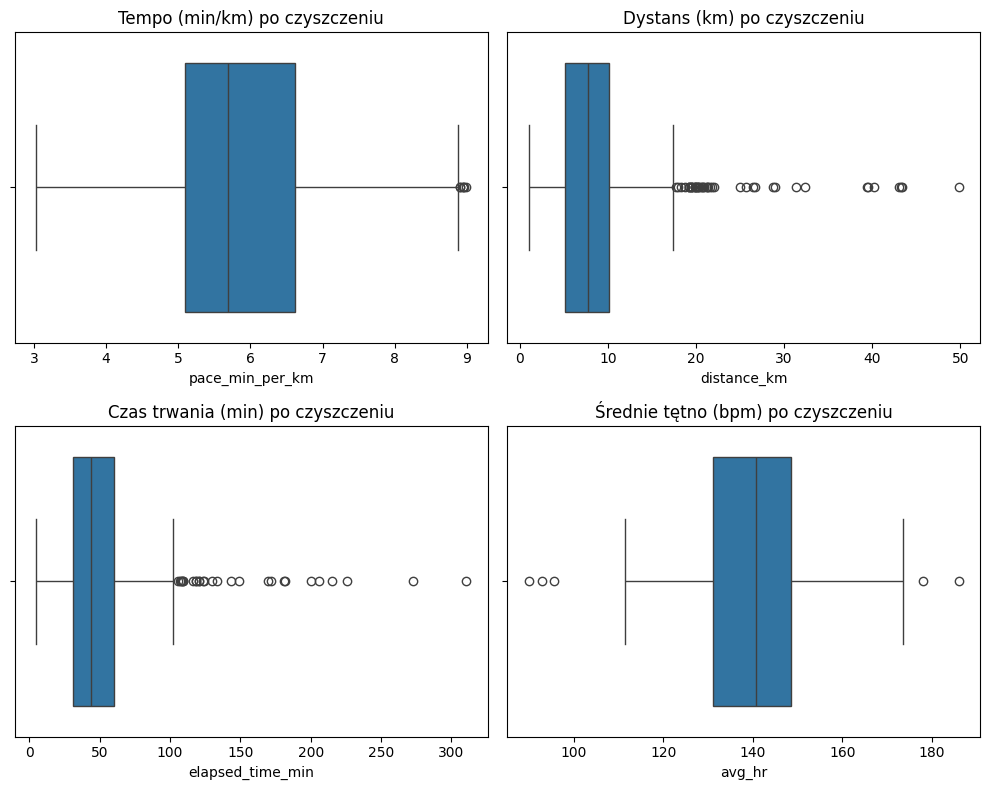


 Gotowe! Po czyszczeniu pozostało 820 rekordów.


<Axes: xlabel='pace_min_per_km'>

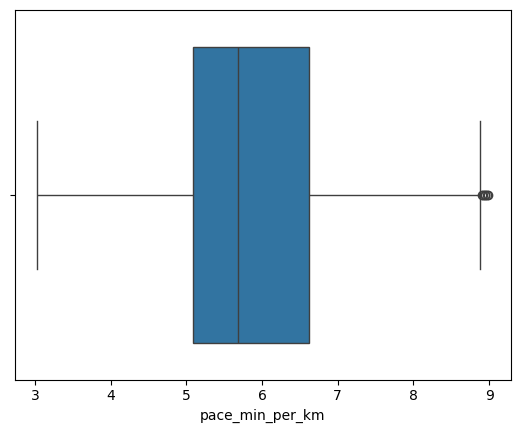

In [15]:
import numpy as np

# Wyczyszczenie wartości nienaturalnych lub błędnych


# Dystans (km) - ekstremalnie długie aktywności 
before = len(df)
df = df[df["distance_km"].between(1, 50)]
print(f"Usunięto {before - len(df)} rekordów z nienaturalnym dystansem")

# Czas trwania (minuty) - aktywności z błędnym czasem
before = len(df)
df = df[df["elapsed_time_min"].between(5, 400)]
print(f"Usunięto {before - len(df)} rekordów z nienaturalnym czasem")

# Tempo (min/km) - zbyt szybkie lub wolne tempa
before = len(df)
df = df[df["pace_min_per_km"].between(3, 9)]
print(f"Usunięto {before - len(df)} rekordów z nienaturalnym tempem")



# Przewyższenie (m) - nierealne wzrosty wysokości
before = len(df)
df = df[df["total_elevation_gain"].between(0, 2000)]
print(f"Usunięto {before - len(df)} rekordów z nienaturalnym przewyższeniem")

# Średnie tętno (bpm) - poza zakresem
before = len(df)
df = df[(df["avg_hr"].isna()) | df["avg_hr"].between(80, 200)]
print(f"Usunięto {before - len(df)} rekordów z nienaturalnym tętnem")

# Reset indeksów 
df.reset_index(drop=True, inplace=True)

#  Wizualizacja po czyszczeniu
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

sns.boxplot(ax=axes[0,0], x=df["pace_min_per_km"])
axes[0,0].set_title("Tempo (min/km) po czyszczeniu")

sns.boxplot(ax=axes[0,1], x=df["distance_km"])
axes[0,1].set_title("Dystans (km) po czyszczeniu")

sns.boxplot(ax=axes[1,0], x=df["elapsed_time_min"])
axes[1,0].set_title("Czas trwania (min) po czyszczeniu")

sns.boxplot(ax=axes[1,1], x=df["avg_hr"])
axes[1,1].set_title("Średnie tętno (bpm) po czyszczeniu")

plt.tight_layout()
plt.show()

print(f"\n Gotowe! Po czyszczeniu pozostało {len(df)} rekordów.")


sns.boxplot(x=df['pace_min_per_km'])


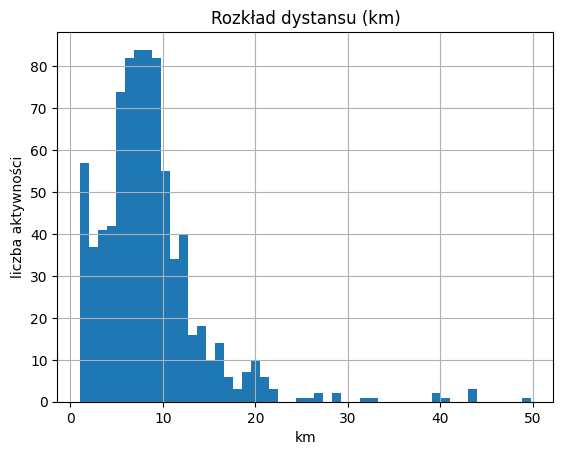

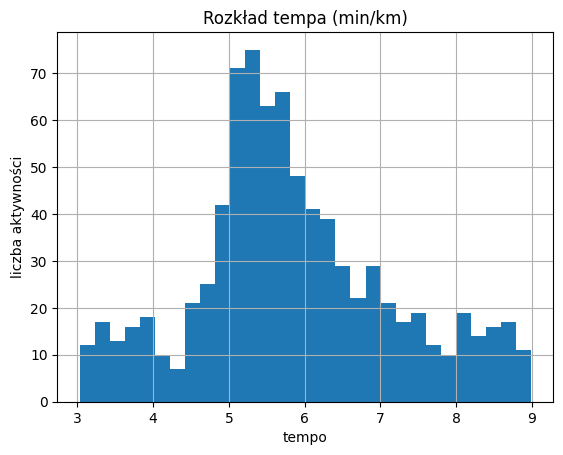

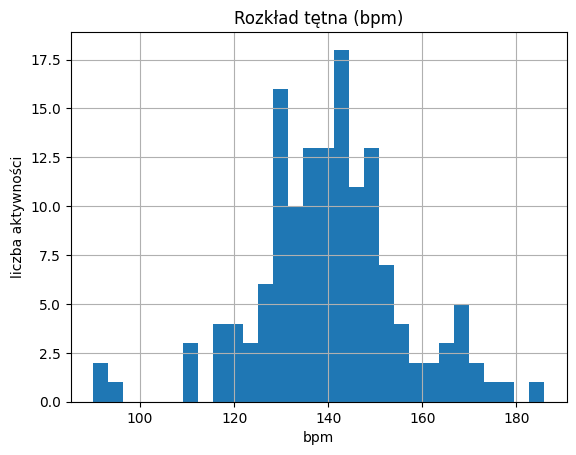

In [16]:
import matplotlib.pyplot as plt

df['distance_km'].hist(bins=50)
plt.title('Rozkład dystansu (km)')
plt.xlabel('km')
plt.ylabel('liczba aktywności')
plt.show()

df['pace_min_per_km'].hist(bins=30)
plt.title('Rozkład tempa (min/km)')
plt.xlabel('tempo')
plt.ylabel('liczba aktywności')
plt.show()

df["avg_hr"].hist(bins=30)
plt.title('Rozkład tętna (bpm)')
plt.xlabel('bpm')
plt.ylabel('liczba aktywności')
plt.show()

<Axes: >

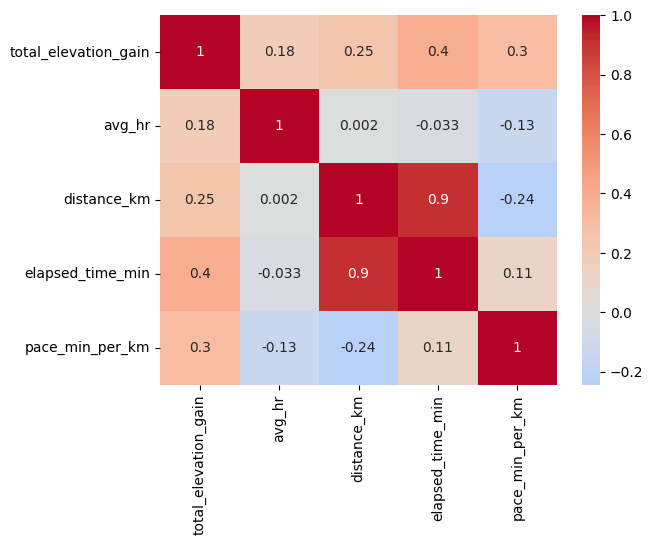

In [18]:
new_df = df[['total_elevation_gain', 'avg_hr', 'distance_km', 'elapsed_time_min',
       'pace_min_per_km']]
sns.heatmap(new_df.corr(method="pearson"), annot=True, cmap="coolwarm", center=0)

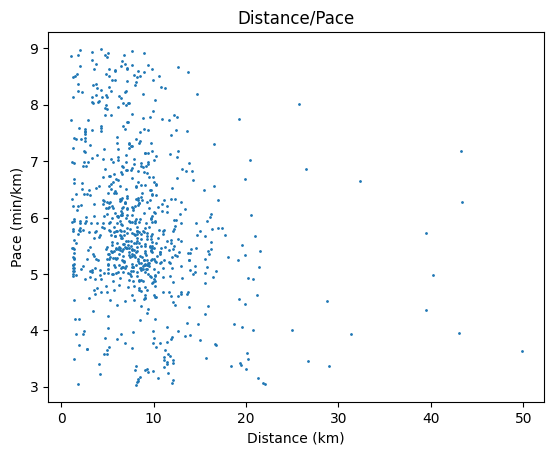

In [19]:
plt.scatter(df["distance_km"], df["pace_min_per_km"], s=1)
plt.title("Distance/Pace")
plt.xlabel("Distance (km)")
plt.ylabel("Pace (min/km)")
plt.show()


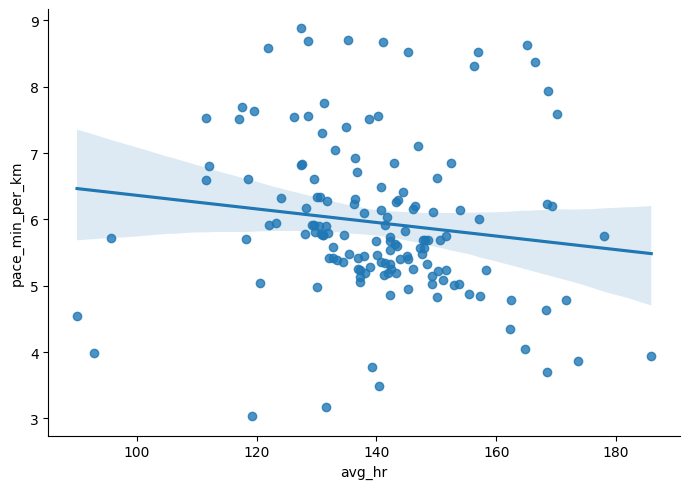

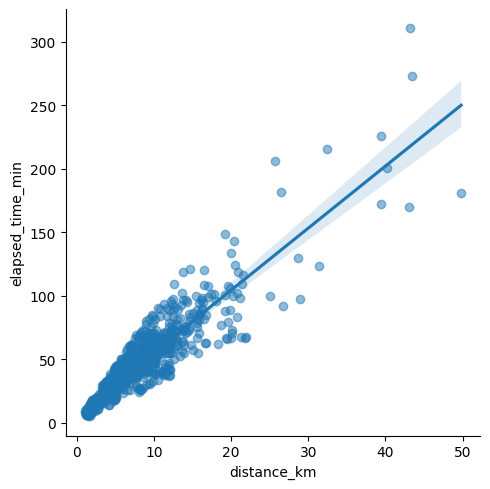

In [21]:
sns.lmplot(data=df, x='avg_hr', y='pace_min_per_km', aspect=1.4)
sns.lmplot(data=df, x='distance_km', y='elapsed_time_min', scatter_kws={'alpha':0.5})

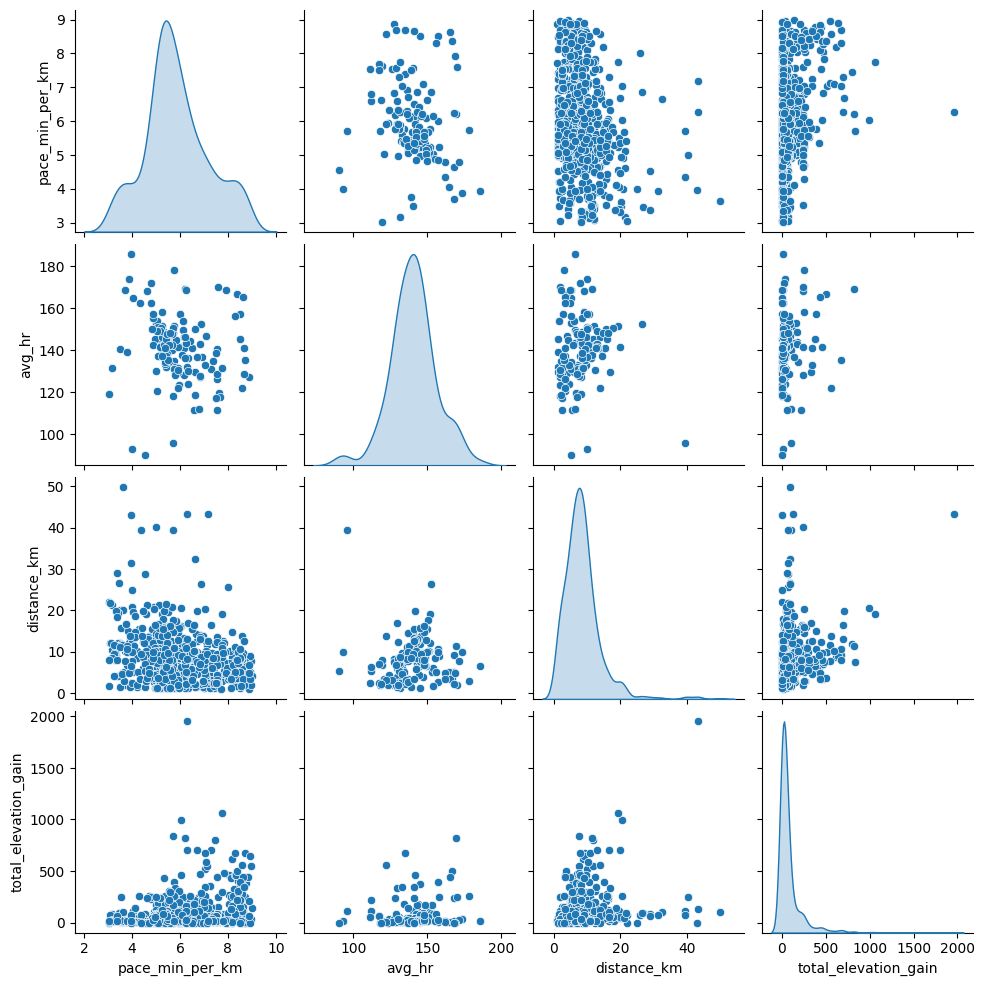

In [23]:
sns.pairplot(df[['pace_min_per_km', 'avg_hr', 'distance_km', 'total_elevation_gain']], diag_kind='kde')
